# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.linalg import eigh
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import FactorAnalysis
from sklearn.neural_network import MLPClassifier


In [2]:
df = pd.read_csv('Liver Patient Dataset (LPD)_train.csv', encoding= 'unicode_escape')
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [3]:
df.tail()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1
30690,30.0,Male,3.1,1.6,253.0,80.0,406.0,6.8,3.9,1.30,1


In [4]:
df.shape

(30691, 11)

In [5]:
df.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4   Alkphos Alkaline Phosphotase          29895 non-null  float64
 5   Sgpt Alamine Aminotransferase         30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8   ALB Albumin                           30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [7]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
df.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
Alkphos Alkaline Phosphotase            796
Sgpt Alamine Aminotransferase           538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
ALB Albumin                             494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [9]:
df.duplicated().sum()

11323

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.tail()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
29974,58.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
29976,28.0,Male,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [12]:
df.shape

(19368, 11)

In [13]:
df['Result'].value_counts()

1    13811
2     5557
Name: Result, dtype: int64

Number of patients diagnosed with liver disease:  13811
Number of patients not diagnosed with liver disease:  5557


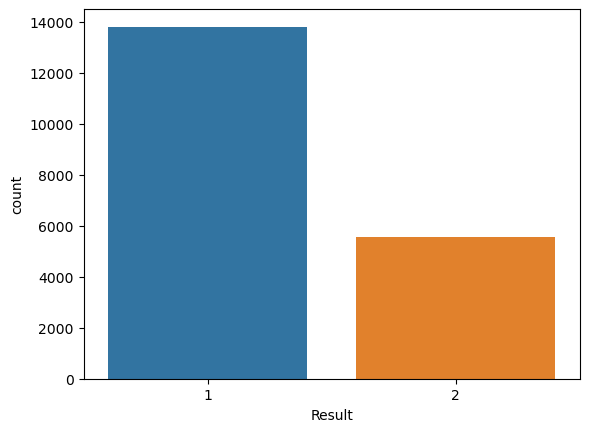

In [14]:
sns.countplot(data=df, x = 'Result', label='Count')

LD, NLD = df['Result'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  13019
Number of patients that are female:  5553


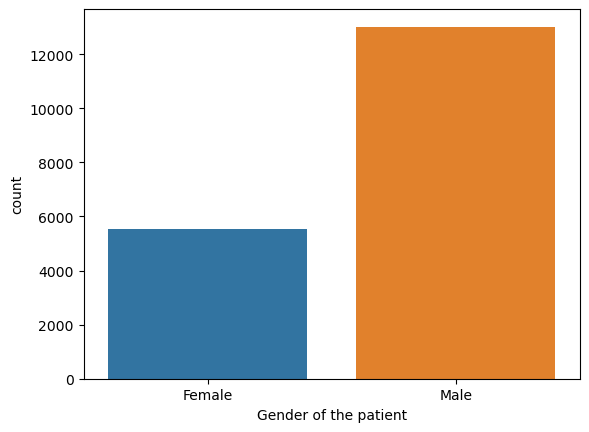

In [15]:
sns.countplot(data=df, x = 'Gender of the patient', label='Count')

M, F = df['Gender of the patient'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

# missing value imputation

# categorical feature

In [16]:

most_frequent_value = df['Gender of the patient'].mode()[0]
df['Gender of the patient'].fillna(most_frequent_value, inplace=True)

In [17]:
df.isnull().sum()

Age of the patient                        1
Gender of the patient                     0
Total Bilirubin                         557
Direct Bilirubin                        490
Alkphos Alkaline Phosphotase            694
Sgpt Alamine Aminotransferase           459
Sgot Aspartate Aminotransferase         393
Total Protiens                          370
ALB Albumin                             413
A/G Ratio Albumin and Globulin Ratio    436
Result                                    0
dtype: int64

# numerical features

In [18]:
numerical_features=['Age of the patient', 'Total Bilirubin',
                               'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
                               'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
                               'Total Protiens', 'ALB Albumin',
                               'A/G Ratio Albumin and Globulin Ratio']

imputer = KNNImputer(n_neighbors=5)
df[numerical_features] = imputer.fit_transform(df[numerical_features])

In [19]:
df.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [20]:
df2=df.reset_index(drop=True)
df2

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
19363,58.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
19364,28.0,Male,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1
19365,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
19366,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1


# One Hot Encoding

In [21]:
df2 = pd.get_dummies(df2, columns=['Gender of the patient'])
df2

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Female,Gender of the patient_Male
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,1,0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,0,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,0,1
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,0,1
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19363,58.0,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1,0,1
19364,28.0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1,0,1
19365,50.0,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1,0,1
19366,54.0,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1,0,1


# Oversampling (SMOTE)

<AxesSubplot:ylabel='Count'>

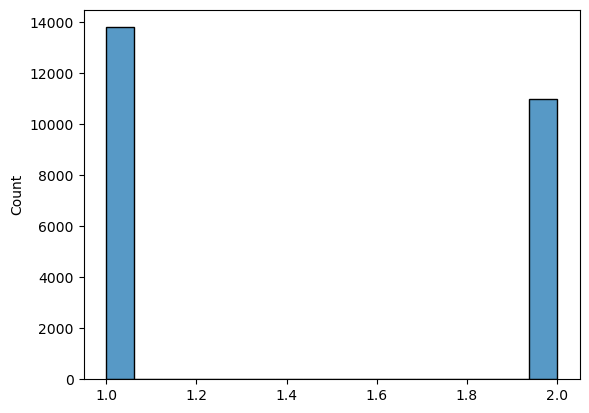

In [22]:
df1=df2

class_counts = df1['Result'].value_counts()
desired_ratio = 11000 / class_counts[2]

X1 = df1.drop('Result',axis=1).values
y1 = df1['Result'].values

sm = SMOTE(sampling_strategy={2: int(desired_ratio * class_counts[2])}, random_state=0)

X_res, y_res = sm.fit_resample(X1, y1)

sns.histplot(y_res)

In [23]:
df_oversampled = pd.DataFrame(X_res, columns=df1.drop('Result', axis=1).columns)
df_oversampled['Result'] = y_res
df_oversampled


,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Gender of the patient_Female,Gender of the patient_Male,Result
0,65.000000,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.000000,0.000000,1
1,62.000000,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0.000000,1.000000,1
2,62.000000,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0.000000,1.000000,1
3,58.000000,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0.000000,1.000000,1
4,72.000000,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24806,37.349942,1.5,0.4,298.0,60.0,103.0,6.0,3.0,1.00,0.325029,0.674971,2
24807,41.081953,1.3,0.6,155.0,15.0,20.0,8.0,4.0,1.00,0.000000,1.000000,2
24808,24.423768,0.7,0.2,188.0,11.0,10.0,5.5,2.3,0.71,0.000000,1.000000,2
24809,58.899246,0.6,0.1,289.0,38.0,30.0,4.8,2.0,0.70,0.000000,1.000000,2


In [24]:
df_oversampled['Result'].value_counts()

1    13811
2    11000
Name: Result, dtype: int64

In [25]:
df=df_oversampled
df['Gender of the patient'] = df[['Gender of the patient_Male','Gender of the patient_Female']].idxmax(axis=1).str.split('_').str[-1]
df.drop(['Gender of the patient_Male', 'Gender of the patient_Female'], axis=1, inplace=True)

In [26]:
df_ini=df
df

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient
0,65.000000,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,Female
1,62.000000,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,Male
2,62.000000,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,Male
3,58.000000,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,Male
4,72.000000,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,Male
...,...,...,...,...,...,...,...,...,...,...,...
24806,37.349942,1.5,0.4,298.0,60.0,103.0,6.0,3.0,1.00,2,Male
24807,41.081953,1.3,0.6,155.0,15.0,20.0,8.0,4.0,1.00,2,Male
24808,24.423768,0.7,0.2,188.0,11.0,10.0,5.5,2.3,0.71,2,Male
24809,58.899246,0.6,0.1,289.0,38.0,30.0,4.8,2.0,0.70,2,Male


# plot the data

# categorical plot

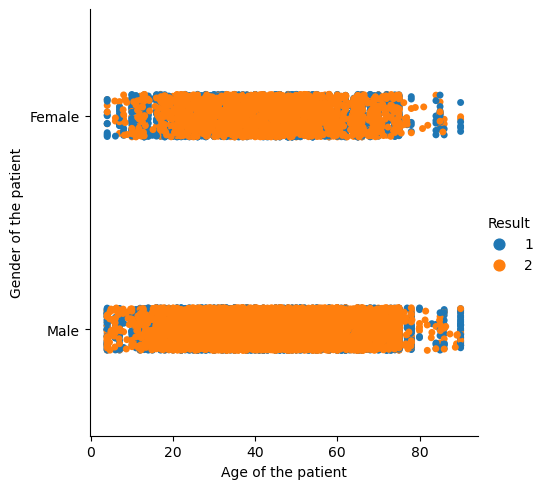

In [27]:
sns.catplot(x="Age of the patient", y="Gender of the patient", hue="Result", data=df)

In [28]:
print(df[['Gender of the patient', 'Result','Age of the patient']].groupby(['Result','Gender of the patient'],as_index=False).mean().sort_values(by='Result', ascending=False))

   Result Gender of the patient  Age of the patient
2       2                Female           43.401953
3       2                  Male           43.957017
0       1                Female           43.227525
1       1                  Male           44.090407


# barplot

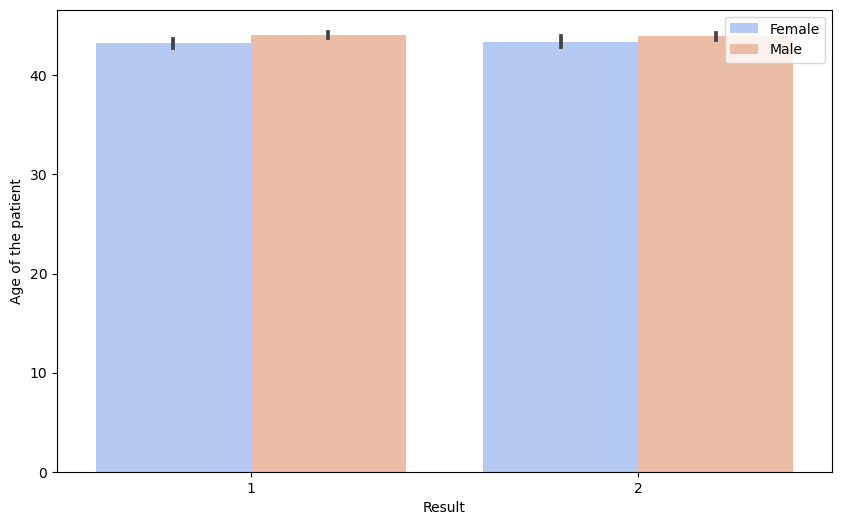

In [29]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Result', y = 'Age of the patient', data= df, hue= 'Gender of the patient', palette='coolwarm')
plt.legend(loc='upper right')

# histogram

Text(0.5, 0.98, 'Disease by Gender and Age')

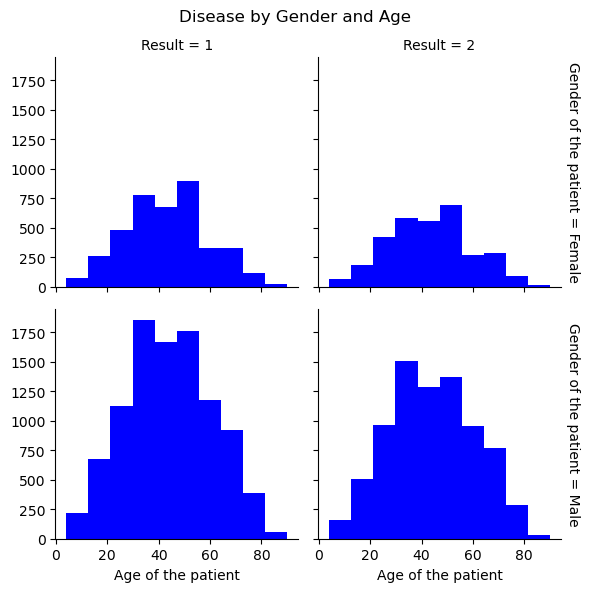

In [30]:
g = sns.FacetGrid(df, col="Result", row="Gender of the patient", margin_titles=True)
g.map(plt.hist, "Age of the patient", color="blue")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

# Scatter plot

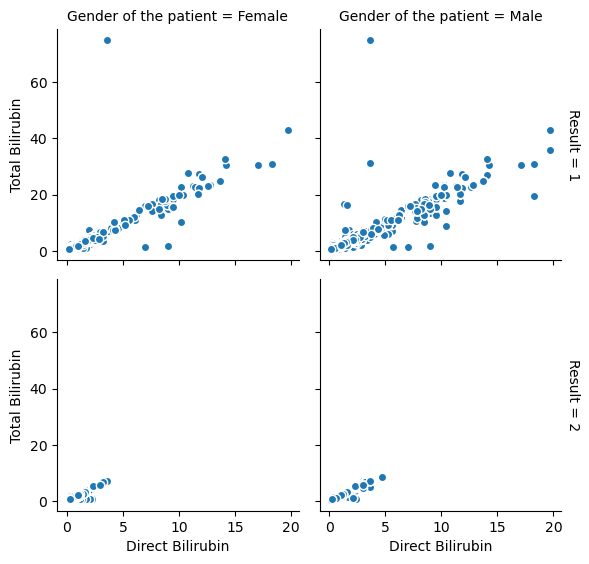

In [31]:
g = sns.FacetGrid(df, col="Gender of the patient", row="Result", margin_titles=True)
g.map(plt.scatter,"Direct Bilirubin", "Total Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

joint distribution of these variables and their individual distributions. Additionally, it includes a regression line to illustrate the linear relationship between the two variables, aiding in understanding their correlation.

# Outlier detection ( box plot )

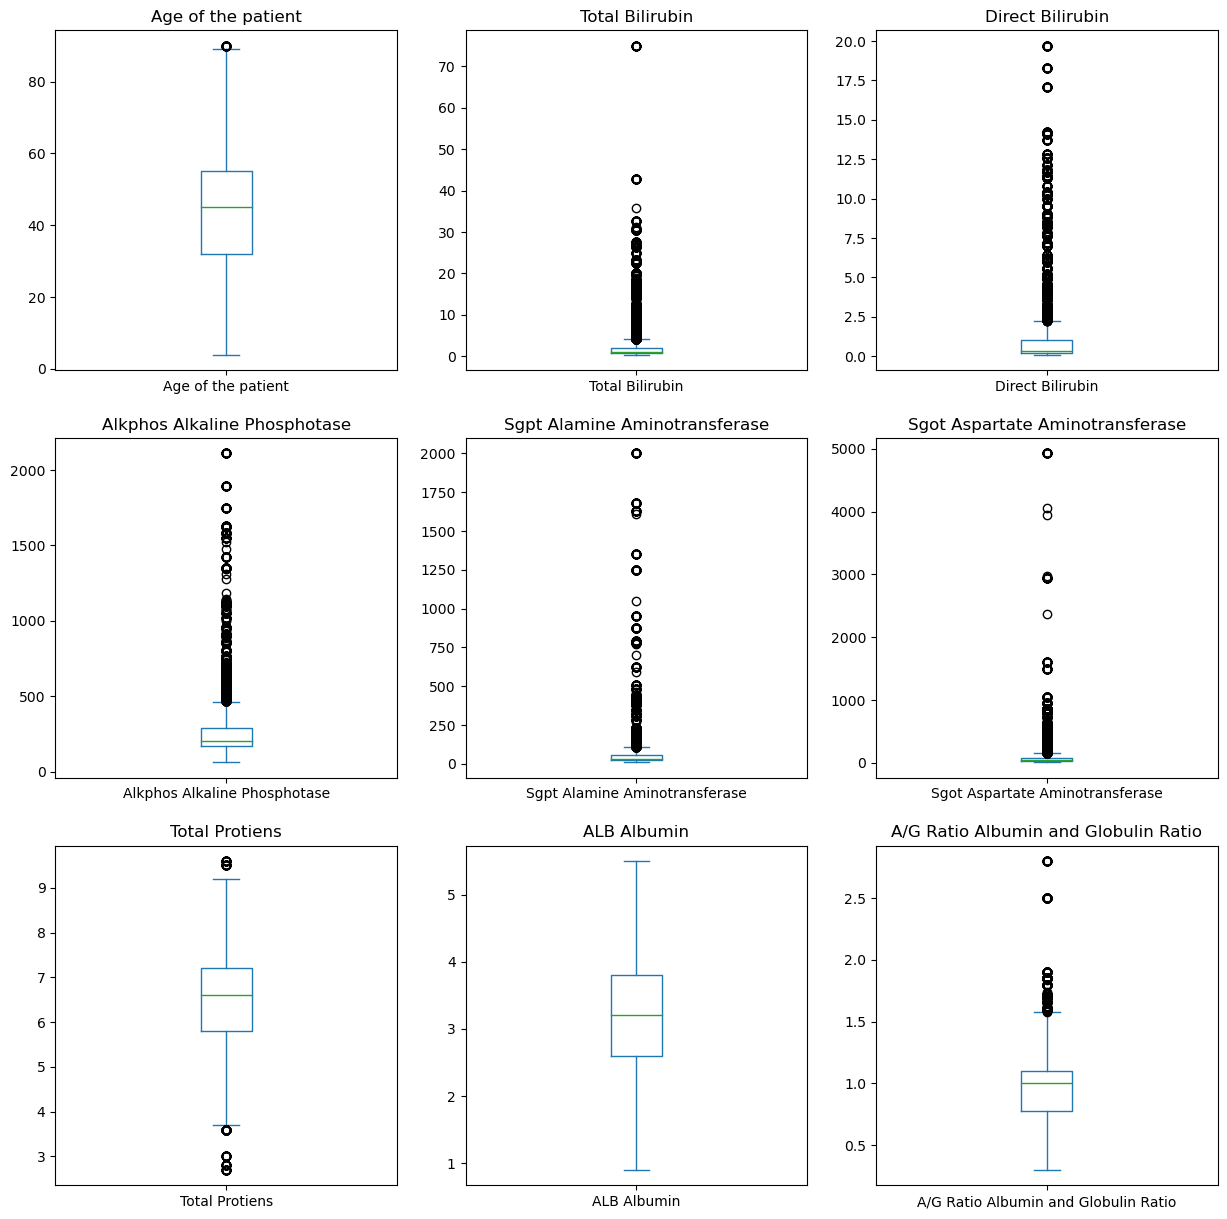

In [32]:

columns_for_boxplot = ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 
                       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 
                       'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']


fig, axs = plt.subplots(3, 3, figsize=(15, 15))


axs = axs.flatten()

for i, feature in enumerate(columns_for_boxplot):
    df[feature].plot(kind='box', ax=axs[i])
    axs[i].set_title(feature)  
    axs[i].set_ylabel("") 
    axs[i].set_xlabel("")  

# Quantile-Quantile plot 

Q-Q plots are used to visually assess whether the data follows a particular distribution, such as the normal distribution. If the data points fall close to the diagonal line, it suggests that the data is normally distributed.

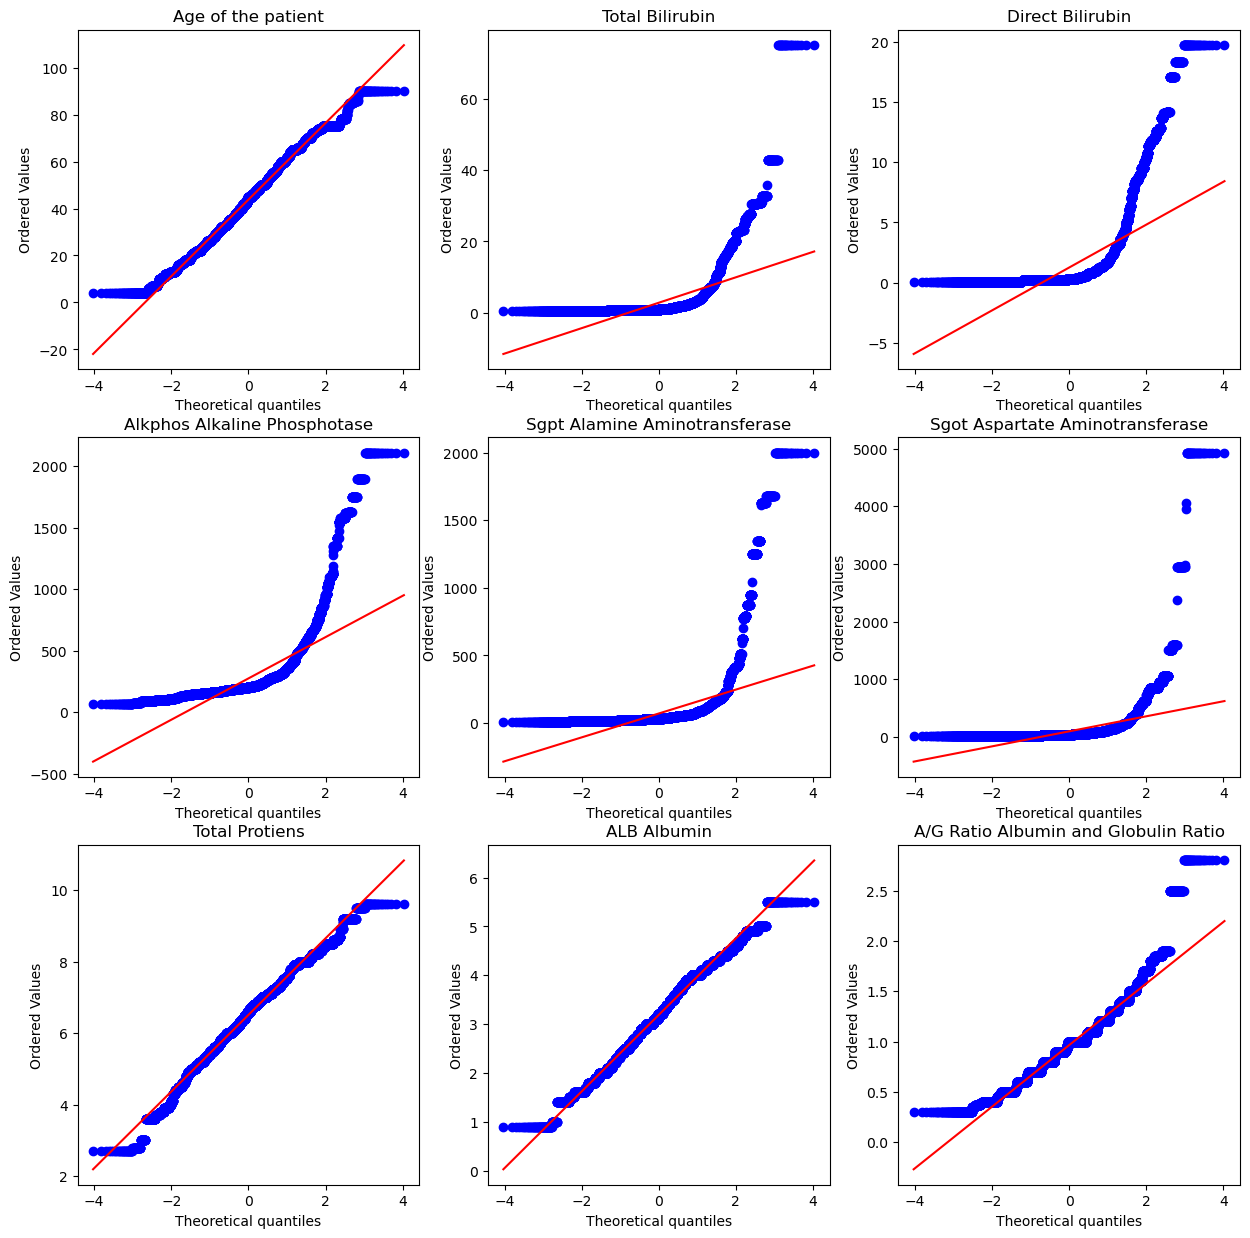

In [33]:
columns_for_qqplot = ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 
                      'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 
                      'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']


fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs = axs.flatten()


for i, feature in enumerate(columns_for_qqplot):
    stats.probplot(df[feature], dist="norm", plot=axs[i])
    axs[i].set_title(feature)  
    axs[i].set_xlabel("Theoretical quantiles")  
    axs[i].set_ylabel("Ordered Values") 


In [34]:
from statsmodels.robust.scale import mad
df_new=df_ini
# Define a function for robust outlier replacement using MAD
def replace_outliers_mad(df_new, column):
    median = df_new[column].median()
    mad_value = mad(df_new[column])
    threshold = 3.5 * mad_value
    
    # Replace outliers with the median
    df_new[column] = np.where(np.abs(df_new[column] - median) > threshold, median, df_new[column])
    
# Apply the robust outlier replacement using MAD to each column
for feature in columns_for_boxplot:
    replace_outliers_mad(df_new, feature)


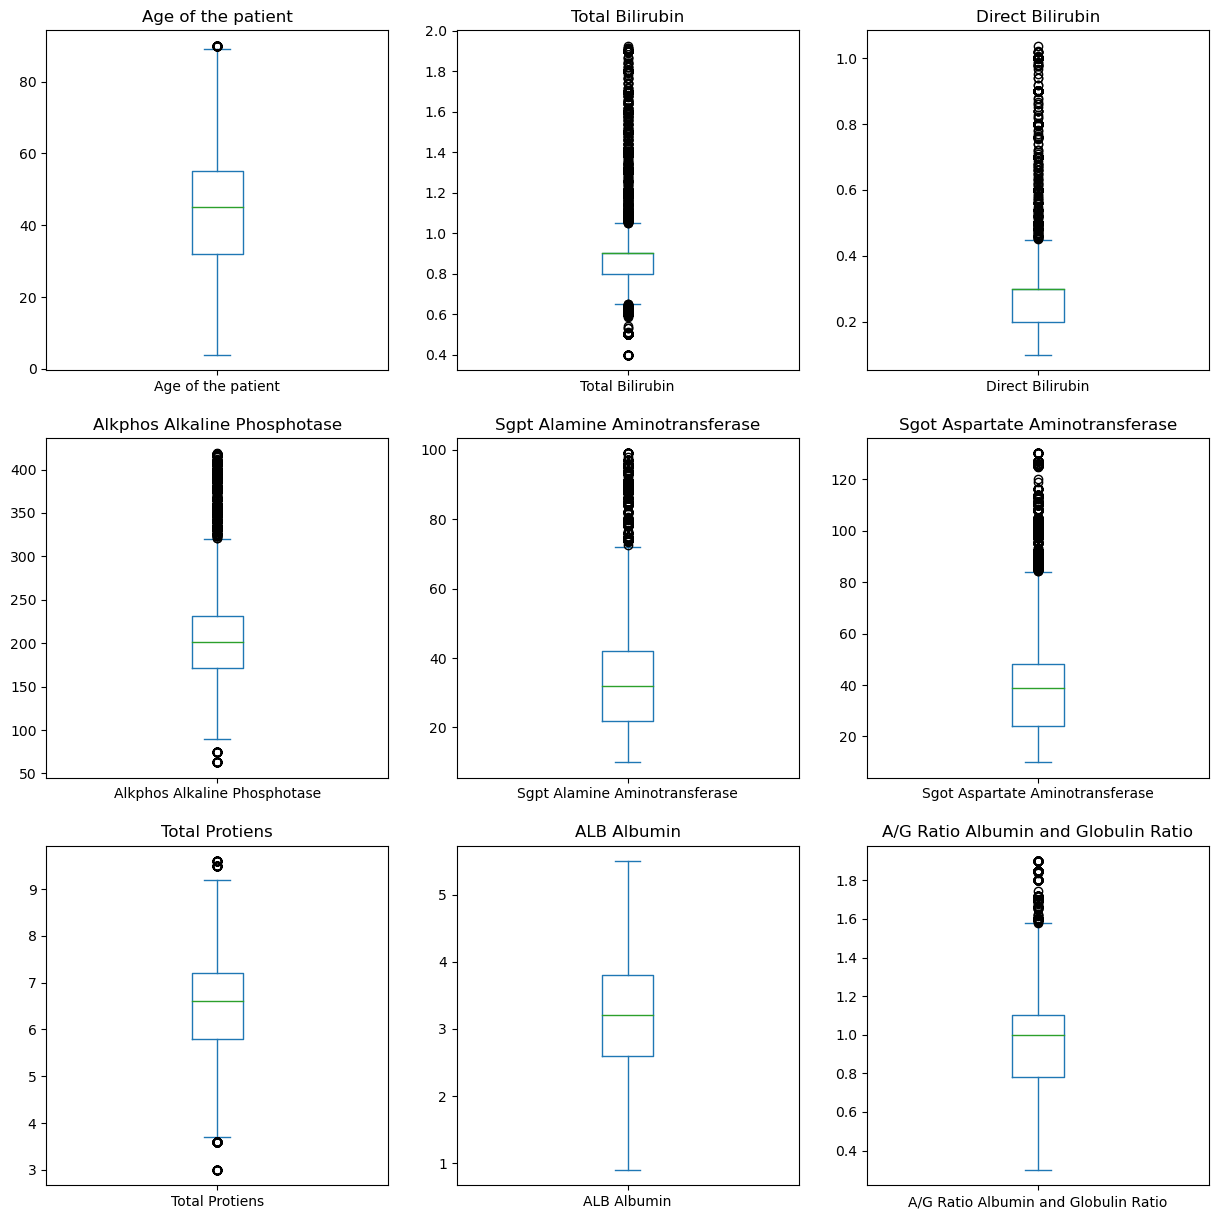

In [35]:

columns_for_boxplot = ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 
                       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 
                       'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']


fig, axs = plt.subplots(3, 3, figsize=(15, 15))


axs = axs.flatten()

for i, feature in enumerate(columns_for_boxplot):
    df_new[feature].plot(kind='box', ax=axs[i])
    axs[i].set_title(feature)  
    axs[i].set_ylabel("") 
    axs[i].set_xlabel("")  

In [36]:
df=df_new
df

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient
0,65.000000,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,Female
1,62.000000,0.9,0.3,201.0,64.0,100.0,7.5,3.2,0.74,1,Male
2,62.000000,0.9,0.3,201.0,60.0,68.0,7.0,3.3,0.89,1,Male
3,58.000000,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,Male
4,72.000000,0.9,0.3,195.0,27.0,59.0,7.3,2.4,0.40,1,Male
...,...,...,...,...,...,...,...,...,...,...,...
24806,37.349942,1.5,0.4,298.0,60.0,103.0,6.0,3.0,1.00,2,Male
24807,41.081953,1.3,0.6,155.0,15.0,20.0,8.0,4.0,1.00,2,Male
24808,24.423768,0.7,0.2,188.0,11.0,10.0,5.5,2.3,0.71,2,Male
24809,58.899246,0.6,0.1,289.0,38.0,30.0,4.8,2.0,0.70,2,Male


# Shapiro wilk test

The Shapiro-Wilk test is a statistical test used to assess the normality of a dataset. It tests the null hypothesis that a sample comes from a normally distributed population. 

1.Perform the Shapiro-Wilk test on each feature in your original dataset.


2.Assess the p-values obtained from the test to determine the normality of each feature.


3.Based on the results, decide whether normalization, transformation, or other preprocessing techniques are necessary.

In [37]:
columns_of_interest = ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin', 
                       'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 
                       'Sgot Aspartate Aminotransferase', 'Total Protiens', 
                       'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']

shapiro_results = {}

for column in columns_of_interest:
    data = df[column].dropna()
    
    stat, p_value = stats.shapiro(data)
    
    shapiro_results[column] = p_value

p_values_df = pd.DataFrame.from_dict(shapiro_results, orient='index', columns=['p-value'])

# Print the table of p-values
print("Table of p-values:")
print(p_values_df)

Table of p-values:
                                           p-value
Age of the patient                    7.288856e-33
Total Bilirubin                       0.000000e+00
Direct Bilirubin                      0.000000e+00
Alkphos Alkaline Phosphotase          0.000000e+00
Sgpt Alamine Aminotransferase         0.000000e+00
Sgot Aspartate Aminotransferase       0.000000e+00
Total Protiens                        7.587326e-31
ALB Albumin                           1.354008e-34
A/G Ratio Albumin and Globulin Ratio  0.000000e+00


In [38]:
decisions = {}

for column, p_value in shapiro_results.items():
    if p_value < 0.05: 
        decisions[column] = "Consider normalization or transformation."
    else:
        decisions[column] = "No action required."

decisions_df = pd.DataFrame.from_dict(decisions, orient='index', columns=['Decision'])


print("\nTable of Decisions:")
print(decisions_df)


Table of Decisions:
                                                                       Decision
Age of the patient                    Consider normalization or transformation.
Total Bilirubin                       Consider normalization or transformation.
Direct Bilirubin                      Consider normalization or transformation.
Alkphos Alkaline Phosphotase          Consider normalization or transformation.
Sgpt Alamine Aminotransferase         Consider normalization or transformation.
Sgot Aspartate Aminotransferase       Consider normalization or transformation.
Total Protiens                        Consider normalization or transformation.
ALB Albumin                           Consider normalization or transformation.
A/G Ratio Albumin and Globulin Ratio  Consider normalization or transformation.


Hence we have to apply normalization for all above features(9 features)

In [39]:
df = pd.get_dummies(df, columns=['Gender of the patient'])
df
df3=df

In [40]:
df3

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Female,Gender of the patient_Male
0,65.000000,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,1,0
1,62.000000,0.9,0.3,201.0,64.0,100.0,7.5,3.2,0.74,1,0,1
2,62.000000,0.9,0.3,201.0,60.0,68.0,7.0,3.3,0.89,1,0,1
3,58.000000,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,0,1
4,72.000000,0.9,0.3,195.0,27.0,59.0,7.3,2.4,0.40,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24806,37.349942,1.5,0.4,298.0,60.0,103.0,6.0,3.0,1.00,2,0,1
24807,41.081953,1.3,0.6,155.0,15.0,20.0,8.0,4.0,1.00,2,0,1
24808,24.423768,0.7,0.2,188.0,11.0,10.0,5.5,2.3,0.71,2,0,1
24809,58.899246,0.6,0.1,289.0,38.0,30.0,4.8,2.0,0.70,2,0,1


# Transformations

In [41]:
columns_of_interest = ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin', 
                       'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 
                       'Sgot Aspartate Aminotransferase', 'Total Protiens', 
                       'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']

X = df3[columns_of_interest]

# Define transformation functions
log_transform = lambda x: np.log(x + 1)  # Adding 1 to avoid log(0)
sqrt_transform = lambda x: np.sqrt(x)

# Apply transformations to your features
X_log = X.apply(log_transform)
X_sqrt = X.apply(sqrt_transform)


In [42]:
X_log

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
0,4.189655,0.530628,0.095310,5.236442,2.833213,2.944439,2.054124,1.458615,0.641854
1,4.143135,0.641854,0.262364,5.308268,4.174387,4.615121,2.140066,1.435085,0.553885
2,4.143135,0.641854,0.262364,5.308268,4.110874,4.234107,2.079442,1.458615,0.636577
3,4.077537,0.693147,0.336472,5.209486,2.708050,3.044522,2.054124,1.481605,0.693147
4,4.290459,0.641854,0.262364,5.278115,3.332205,4.094345,2.116256,1.223775,0.336472
...,...,...,...,...,...,...,...,...,...
24806,3.646753,0.916291,0.336472,5.700444,4.110874,4.644391,1.945910,1.386294,0.693147
24807,3.739619,0.832909,0.470004,5.049856,2.772589,3.044522,2.197225,1.609438,0.693147
24808,3.235685,0.530628,0.182322,5.241747,2.484907,2.397895,1.871802,1.193922,0.536493
24809,4.092664,0.470004,0.095310,5.669881,3.663562,3.433987,1.757858,1.098612,0.530628


In [43]:
X_sqrt

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
0,8.062258,0.836660,0.316228,13.674794,4.000000,4.242641,2.607681,1.816590,0.948683
1,7.874008,0.948683,0.547723,14.177447,8.000000,10.000000,2.738613,1.788854,0.860233
2,7.874008,0.948683,0.547723,14.177447,7.745967,8.246211,2.645751,1.816590,0.943398
3,7.615773,1.000000,0.632456,13.490738,3.741657,4.472136,2.607681,1.843909,1.000000
4,8.485281,0.948683,0.547723,13.964240,5.196152,7.681146,2.701851,1.549193,0.632456
...,...,...,...,...,...,...,...,...,...
24806,6.111460,1.224745,0.632456,17.262677,7.745967,10.148892,2.449490,1.732051,1.000000
24807,6.409521,1.140175,0.774597,12.449900,3.872983,4.472136,2.828427,2.000000,1.000000
24808,4.942041,0.836660,0.447214,13.711309,3.316625,3.162278,2.345208,1.516575,0.842615
24809,7.674584,0.774597,0.316228,17.000000,6.164414,5.477226,2.190890,1.414214,0.836660


# Normalization using Z-score statistic

In [44]:
columns_of_interest = ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin', 
                       'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 
                       'Sgot Aspartate Aminotransferase', 'Total Protiens', 
                       'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']
X = df[columns_of_interest]

scaler = StandardScaler()
X_normalized =scaler.fit_transform(X)
X_normalized

array([[ 1.29285526, -0.78990528, -1.0569844 , ...,  0.26421546,
         0.14135277, -0.19626704],
       [ 1.1097074 , -0.08098097, -0.03996911, ...,  0.92559977,
         0.01439005, -0.74085998],
       [ 1.1097074 , -0.08098097, -0.03996911, ...,  0.45318241,
         0.14135277, -0.2303041 ],
       ...,
       [-1.18429481, -0.78990528, -0.54847675, ..., -0.96406969,
        -1.12827439, -0.84297116],
       [ 0.92040857, -1.14436744, -1.0569844 , ..., -1.625454  ,
        -1.50916254, -0.87700822],
       [ 1.38163545, -0.43544313, -0.54847675, ..., -0.39716885,
         0.14135277,  0.82484473]])

In [45]:
df[columns_of_interest] = X_normalized
df

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Female,Gender of the patient_Male
0,1.292855,-0.789905,-1.056984,-0.377171,-1.040260,-0.979077,0.264215,0.141353,-0.196267,1,1,0
1,1.109707,-0.080981,-0.039969,-0.152867,1.627277,2.451024,0.925600,0.014390,-0.740860,1,0,1
2,1.109707,-0.080981,-0.039969,-0.152867,1.404982,1.112448,0.453182,0.141353,-0.230304,1,0,1
3,0.865510,0.273481,0.468539,-0.457279,-1.151407,-0.895416,0.264215,0.268315,0.144104,1,0,1
4,1.720200,-0.080981,-0.039969,-0.248997,-0.428949,0.735974,0.736633,-1.001312,-1.898120,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24806,-0.395161,2.045792,0.468539,1.401237,1.404982,2.576516,-0.491652,-0.239535,0.144104,2,0,1
24807,-0.167324,1.336868,1.485554,-0.889865,-1.095834,-0.895416,1.398017,1.030092,0.144104,2,0,1
24808,-1.184295,-0.789905,-0.548477,-0.361149,-1.318128,-1.313721,-0.964070,-1.128274,-0.842971,2,0,1
24809,0.920409,-1.144367,-1.056984,1.257042,0.182361,-0.477111,-1.625454,-1.509163,-0.877008,2,0,1


# Feature extraction

# Linear Discriminant Analysis(LDA)

In [46]:
def lda_selection(X, y):
    
    mean_class_1 = np.mean(X[y == 1], axis=0)
    mean_class_2 = np.mean(X[y == 2], axis=0)

    # Calculate within-class scatter matrix
    SW = np.cov(X[y == 1].T) + np.cov(X[y == 2].T)

    # Calculate between-class scatter matrix
    mean_diff=(mean_class_1 - mean_class_2).reshape(-1,1)
    SB=np.dot(mean_diff,mean_diff.T)

    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.pinv(SW).dot(SB))

    # Sort eigenvalues and corresponding eigenvectors
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    

    W = eigenvectors[:, :1]

    # Project data 
    X_lda = X.dot(W)
    
    plt.scatter(X_lda[y==1],np.zeros_like(X_lda[y==1]),color='red',label='with liver')
    plt.scatter(X_lda[y==2],np.zeros_like(X_lda[y==2]),color='blue',label='without liver')
    plt.title('LDA projection on liver dataset')
    plt.legend()
    
    return X_lda, W


# Principal Component Analysis (PCA)

In [47]:
def pca_reduction(X):    
    # Compute the covariance matrix
    cov_matrix = np.cov(X.T)
    
    # Compute eigenvalues and eigenvectors
    eigvals, eigvecs = eigh(cov_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    
    # Compute explained variance ratio
    explained_variance_ratio = eigvals / np.sum(eigvals)
    explained_variance_cumsum = np.cumsum(explained_variance_ratio)
    
    # Find the number of components required to explain 95% variance
    n_components = np.argmax(explained_variance_cumsum >= 0.95) + 1
    
    # Project data onto the principal components
    W = eigvecs[:, :n_components]
    X_pca = X.dot(W)
    
    return X_pca, W

# Factor Analysis (FA)

In [48]:
def factor_analysis_reduction(X):
   
    max_components = min(df.shape) - 1  # Maximum number of components
    fa_models = [FactorAnalysis(n_components=i).fit(df) for i in range(1, max_components+1)]

    # Calculate eigenvalues for each component
    eigenvalues = [np.diag(model.get_covariance()).sum() for model in fa_models]

    # Plot Scree Plot
    plt.plot(range(1, max_components+1), eigenvalues, marker='o', linestyle='-')
    plt.title('Scree Plot')
    plt.xlabel('Number of Components')
    plt.ylabel('Eigenvalues')
    plt.xticks(np.arange(1, max_components+1))
    plt.grid(True)
    plt.show()

    # Determine the number of components based on the Scree Plot (e.g., using the elbow method)

    fa=FactorAnalysis(n_components=4)
    X_fa = fa.fit_transform(X)
    return X_fa, fa.components_

# Feature Integration

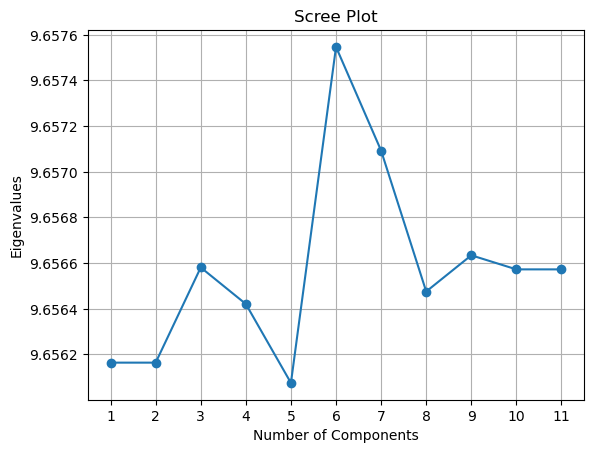

(24811, 8)
DataFrame with Extracted Features:
                    PCA_1               PCA_2               PCA_3  \
0     -0.920677+0.000000j  1.689193+0.000000j -0.402876+0.000000j   
1      0.836724+0.000000j -1.268198+0.000000j  2.148329+0.000000j   
2      0.340636+0.000000j -0.793670+0.000000j  1.336726+0.000000j   
3     -0.762535+0.000000j  0.188299+0.000000j -1.452650+0.000000j   
4      1.237140+0.000000j  0.447583+0.000000j -0.044378+0.000000j   
...                   ...                 ...                 ...   
24806  1.856000+0.000000j -2.740892+0.000000j  1.373751+0.000000j   
24807 -1.487971+0.000000j -1.398417+0.000000j -2.151084+0.000000j   
24808  0.674107+0.000000j  2.271326+0.000000j -1.174012+0.000000j   
24809  1.864729+0.000000j  2.003136+0.000000j  0.708098+0.000000j   
24810 -0.837442+0.000000j  1.077865+0.000000j -0.545295+0.000000j   

                    PCA_4               PCA_5               PCA_6  \
0      1.255787+0.000000j  0.356742+0.000000j  0.274377+

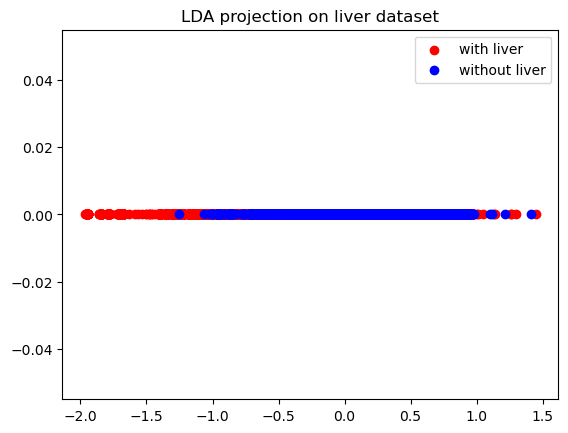

In [49]:
def integrate_features(X_pca, X_fa, X_lda):
    S = np.concatenate((X_pca, X_fa, X_lda), axis=1)
    return S


def extract_features(df):
    X = df.drop('Result',axis=1).values
    y = df['Result'] 
    
    # Step 1: PCA
    X_pca, pca_components = pca_reduction(X)
    
    # Step 2: Factor Analysis
    X_fa, fa_components = factor_analysis_reduction(X)
    
    # Step 3: LDA
    X_lda, lda_coefficients = lda_selection(X, y)
    
    # Step 4: Integration
    S = integrate_features(X_pca, X_fa, X_lda)
    
    print(X_pca.shape)
    
    feature_names_pca = [f'PCA_{i+1}' for i in range(X_pca.shape[1])]
    feature_names_fa = [f'FA_{i+1}' for i in range(X_fa.shape[1])]
    feature_names_lda = ['LDA']

    feature_names = feature_names_pca + feature_names_fa + feature_names_lda

    extracted_features_df = pd.DataFrame(S, columns=feature_names)

    print("DataFrame with Extracted Features:")
    print(extracted_features_df)
    return S,pca_components,fa_components,lda_coefficients,X_pca,X_fa,X_lda

extracted_features,pca_components,fa_components,lda_coefficients,X_pca,X_fa,X_lda = extract_features(df)



In [50]:
print("Extracted Feature Matrix:")
print(extracted_features)

Extracted Feature Matrix:
[[-0.92067721+0.j  1.68919275+0.j -0.40287638+0.j ... -1.02641103+0.j
  -0.6792823 +0.j  0.45950057+0.j]
 [ 0.83672431+0.j -1.26819833+0.j  2.1483286 +0.j ...  0.24189024+0.j
   1.88493112+0.j -0.95148397+0.j]
 [ 0.34063578+0.j -0.79367014+0.j  1.33672648+0.j ...  0.12281486+0.j
   1.15364263+0.j -0.47220153+0.j]
 ...
 [ 0.67410651+0.j  2.27132579+0.j -1.17401165+0.j ... -0.84739536+0.j
  -1.13711946+0.j  0.32776461+0.j]
 [ 1.86472922+0.j  2.0031355 +0.j  0.70809798+0.j ... -1.08154959+0.j
   0.12035805+0.j -0.27152094+0.j]
 [-0.83744176+0.j  1.07786528+0.j -0.54529467+0.j ... -0.61431023+0.j
  -0.73688062+0.j  0.48892775+0.j]]


In [51]:
X_pca

array([[-0.92067721,  1.68919275, -0.40287638, ...,  0.27437661,
         0.04512607,  0.73188887],
       [ 0.83672431, -1.26819833,  2.1483286 , ...,  1.50890483,
         0.65831083, -0.65062296],
       [ 0.34063578, -0.79367014,  1.33672648, ...,  0.7795578 ,
        -0.15329836, -0.66011575],
       ...,
       [ 0.67410651,  2.27132579, -1.17401165, ..., -0.09836362,
        -0.123834  , -0.74680296],
       [ 1.86472922,  2.0031355 ,  0.70809798, ..., -0.9827168 ,
        -0.62442842, -0.68572273],
       [-0.83744176,  1.07786528, -0.54529467, ..., -1.03161905,
         0.24745517, -0.69800075]])

In [52]:
X_fa

array([[ 1.57566951,  0.14380876, -1.02641103, -0.6792823 ],
       [-0.63465085,  0.01279943,  0.24189024,  1.88493112],
       [-0.63465085,  0.1384248 ,  0.12281486,  1.15364263],
       ...,
       [-0.63465085, -1.12204679, -0.84739536, -1.13711946],
       [-0.63465085, -1.50697189, -1.08154959,  0.12035805],
       [-0.63465085,  0.14322011, -0.61431023, -0.73688062]])

In [53]:
X_lda

array([[ 0.45950057+0.j],
       [-0.95148397+0.j],
       [-0.47220153+0.j],
       ...,
       [ 0.32776461+0.j],
       [-0.27152094+0.j],
       [ 0.48892775+0.j]])

In [54]:
S_values = np.array(extracted_features)
print(S_values)

[[-0.92067721+0.j  1.68919275+0.j -0.40287638+0.j ... -1.02641103+0.j
  -0.6792823 +0.j  0.45950057+0.j]
 [ 0.83672431+0.j -1.26819833+0.j  2.1483286 +0.j ...  0.24189024+0.j
   1.88493112+0.j -0.95148397+0.j]
 [ 0.34063578+0.j -0.79367014+0.j  1.33672648+0.j ...  0.12281486+0.j
   1.15364263+0.j -0.47220153+0.j]
 ...
 [ 0.67410651+0.j  2.27132579+0.j -1.17401165+0.j ... -0.84739536+0.j
  -1.13711946+0.j  0.32776461+0.j]
 [ 1.86472922+0.j  2.0031355 +0.j  0.70809798+0.j ... -1.08154959+0.j
   0.12035805+0.j -0.27152094+0.j]
 [-0.83744176+0.j  1.07786528+0.j -0.54529467+0.j ... -0.61431023+0.j
  -0.73688062+0.j  0.48892775+0.j]]


# Train Test Split

In [55]:
X=df.drop('Result',axis=1)
y=df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train.shape

(19848, 11)

In [57]:
X_test.shape

(4963, 11)

# Logistic Regression

In [58]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [59]:
ypred=lr.predict(X_test)
ypred

array([1, 2, 2, ..., 1, 2, 2], dtype=int64)

In [60]:
accuracy_score(y_test,ypred)

0.6592786620995366

In [61]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       0.69      0.71      0.70      2770
           2       0.62      0.60      0.61      2193

    accuracy                           0.66      4963
   macro avg       0.65      0.65      0.65      4963
weighted avg       0.66      0.66      0.66      4963



In [62]:
print('AUC Score: ',round(roc_auc_score(y_test,ypred)*100,2),'%')

AUC Score:  65.26 %


Text(50.722222222222214, 0.5, 'Actual values')

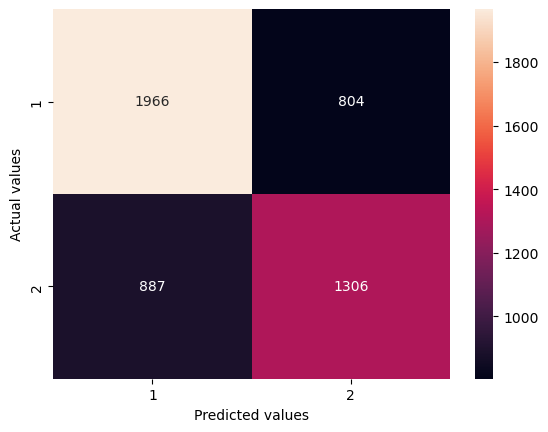

In [63]:
cm=confusion_matrix(y_test,ypred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=[1,2],yticklabels=[1,2])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

# KNN Classifier

In [64]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
knn_ypred=knn.predict(X_test)
knn_ypred

array([2, 2, 2, ..., 2, 1, 2], dtype=int64)

In [66]:
accuracy_score(y_test,knn_ypred)

0.9663509973806166

In [67]:
print(classification_report(y_test,knn_ypred))

              precision    recall  f1-score   support

           1       0.97      0.96      0.97      2770
           2       0.96      0.97      0.96      2193

    accuracy                           0.97      4963
   macro avg       0.97      0.97      0.97      4963
weighted avg       0.97      0.97      0.97      4963



In [68]:
print('AUC Score: ',round(roc_auc_score(y_test,knn_ypred)*100,2),'%')

AUC Score:  96.66 %


Text(50.722222222222214, 0.5, 'Actual values')

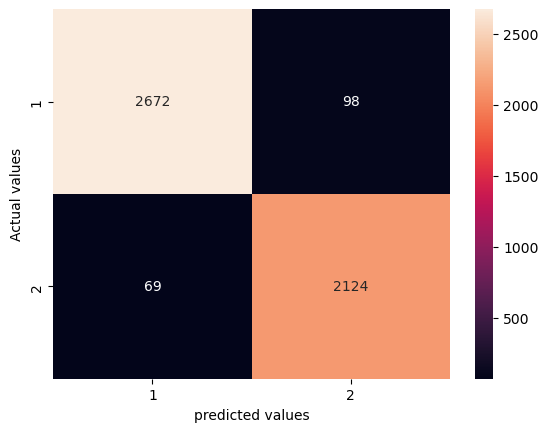

In [69]:
knn_cm=confusion_matrix(y_test,knn_ypred)
sns.heatmap(knn_cm,annot=True,fmt='d',xticklabels=[1,2],yticklabels=[1,2])
plt.xlabel('predicted values')
plt.ylabel('Actual values')

# Support Vector Machine

In [143]:
svm=SVC(kernel='linear',probability=True)
svm.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [144]:
svm_ypred=svm.predict(X_test)
svm_ypred

array([1, 2, 2, ..., 1, 2, 2], dtype=int64)

In [145]:
accuracy_score(y_test,svm_ypred)

0.6745919806568608

In [146]:
print(classification_report(y_test,svm_ypred))

              precision    recall  f1-score   support

           1       0.72      0.68      0.70      2770
           2       0.62      0.67      0.65      2193

    accuracy                           0.67      4963
   macro avg       0.67      0.67      0.67      4963
weighted avg       0.68      0.67      0.68      4963



In [147]:
print('AUC Score: ',round(roc_auc_score(y_test,svm_ypred)*100,2),'%')

AUC Score:  67.41 %


Text(50.722222222222214, 0.5, 'Actual values')

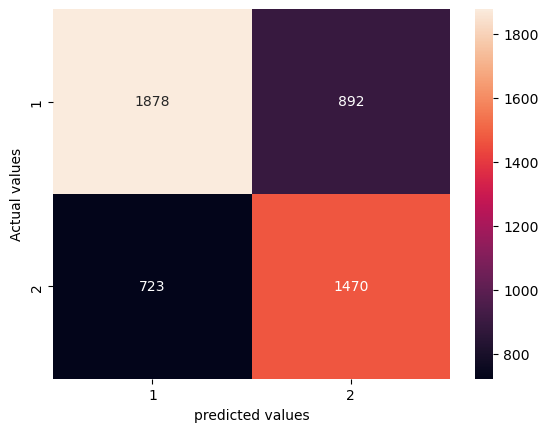

In [148]:
svm_cm=confusion_matrix(y_test,svm_ypred)
sns.heatmap(svm_cm,annot=True,fmt='d',xticklabels=[1,2],yticklabels=[1,2])
plt.xlabel('predicted values')
plt.ylabel('Actual values')

# RandomForestClassifier

In [76]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
rf_ypred=rf.predict(X_test)
rf_ypred

array([2, 2, 2, ..., 2, 1, 1], dtype=int64)

In [78]:
accuracy_score(y_test,rf_ypred)

0.995567197259722

In [79]:
print(classification_report(y_test,rf_ypred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00      2770
           2       1.00      0.99      0.99      2193

    accuracy                           1.00      4963
   macro avg       1.00      1.00      1.00      4963
weighted avg       1.00      1.00      1.00      4963



In [80]:
print('AUC Score: ',round(roc_auc_score(y_test,rf_ypred)*100,2),'%')

AUC Score:  99.54 %


Text(50.722222222222214, 0.5, 'Actual values')

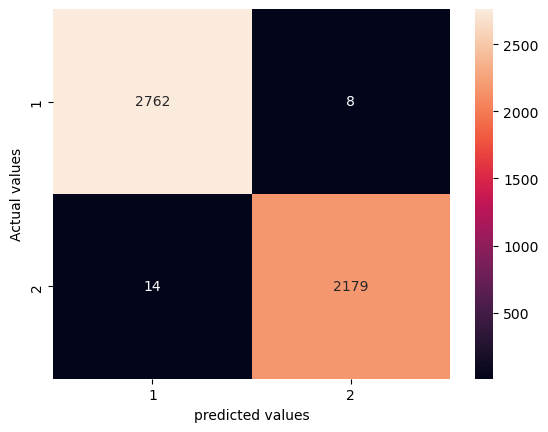

In [81]:
rf_cm=confusion_matrix(y_test,rf_ypred)
sns.heatmap(rf_cm,annot=True,fmt='d',xticklabels=[1,2],yticklabels=[1,2])
plt.xlabel('predicted values')
plt.ylabel('Actual values')

# MLPclassifier

In [82]:
mlp=MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier()

In [83]:
mlp_ypred=mlp.predict(X_test)
mlp_ypred

array([2, 2, 2, ..., 2, 1, 1], dtype=int64)

In [84]:
accuracy_score(y_test,mlp_ypred)

0.9721942373564376

In [85]:
print(classification_report(y_test,mlp_ypred))

              precision    recall  f1-score   support

           1       0.98      0.97      0.98      2770
           2       0.97      0.97      0.97      2193

    accuracy                           0.97      4963
   macro avg       0.97      0.97      0.97      4963
weighted avg       0.97      0.97      0.97      4963



In [86]:
print('AUC Score: ',round(roc_auc_score(y_test,mlp_ypred)*100,2),'%')

AUC Score:  99.54 %


Text(50.722222222222214, 0.5, 'Actual values')

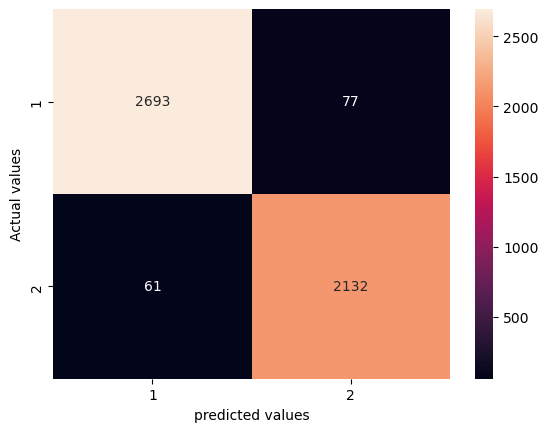

In [87]:
mlp_cm=confusion_matrix(y_test,mlp_ypred)
sns.heatmap(mlp_cm,annot=True,fmt='d',xticklabels=[1,2],yticklabels=[1,2])
plt.xlabel('predicted values')
plt.ylabel('Actual values')

# EnsembleClassifier

In [88]:
ensemble = VotingClassifier(estimators=[
    ('lr', lr),
    ('svm', svm),
    ('rf', rf),
    ('knn', knn),
    ('mlp',mlp)
    
], voting='hard')
ensemble.fit(X_train, y_train)



VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svm', SVC(kernel='linear')),
                             ('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('mlp', MLPClassifier())])

In [89]:
ens_ypred = ensemble.predict(X_test)
ens_ypred

array([2, 2, 2, ..., 2, 1, 2], dtype=int64)

In [90]:
accuracy = accuracy_score(y_test, ens_ypred)
print("Accuracy:", accuracy)

Accuracy: 0.9691718718517026


In [91]:
print(classification_report(y_test,ens_ypred))

              precision    recall  f1-score   support

           1       0.98      0.96      0.97      2770
           2       0.95      0.98      0.97      2193

    accuracy                           0.97      4963
   macro avg       0.97      0.97      0.97      4963
weighted avg       0.97      0.97      0.97      4963



In [92]:
print('AUC Score: ',round(roc_auc_score(y_test,ens_ypred)*100,2),'%')

AUC Score:  97.04 %


Text(50.722222222222214, 0.5, 'Actual values')

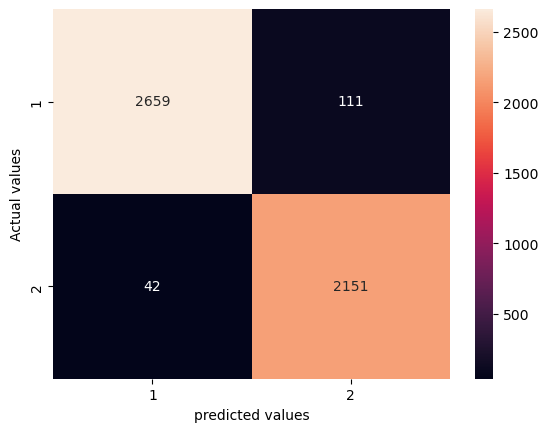

In [93]:
ens_cm=confusion_matrix(y_test,ens_ypred)
sns.heatmap(ens_cm,annot=True,fmt='d',xticklabels=[1,2],yticklabels=[1,2])
plt.xlabel('predicted values')
plt.ylabel('Actual values')

In [94]:
integ_y=df['Result']
integ_X_train,integ_X_test,integ_y_train,integ_y_test = train_test_split(np.real(extracted_features),integ_y, test_size=0.2, random_state=42)

# Logistic Regression (Integrated Features)

In [95]:
integ_lr=LogisticRegression()
integ_lr.fit(integ_X_train,integ_y_train)

LogisticRegression()

In [96]:
integ_lr_ypred=integ_lr.predict(integ_X_test)
integ_lr_ypred

array([1, 2, 2, ..., 1, 2, 2], dtype=int64)

In [97]:
accuracy_score(integ_lr_ypred,integ_y_test)

0.6594801531331855

In [98]:
print(classification_report(integ_y_test,integ_lr_ypred))

              precision    recall  f1-score   support

           1       0.69      0.71      0.70      2770
           2       0.62      0.60      0.61      2193

    accuracy                           0.66      4963
   macro avg       0.65      0.65      0.65      4963
weighted avg       0.66      0.66      0.66      4963



In [99]:
print('AUC Score: ',round(roc_auc_score(integ_y_test,integ_lr_ypred)*100,2),'%')

AUC Score:  65.28 %


Text(50.722222222222214, 0.5, 'Actual values')

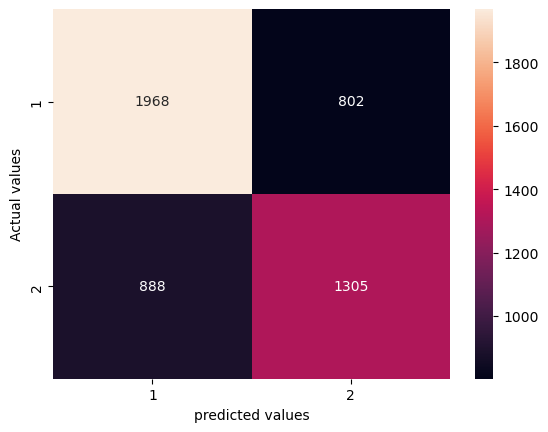

In [100]:
integ_lr_cm=confusion_matrix(integ_y_test,integ_lr_ypred)
sns.heatmap(integ_lr_cm,annot=True,fmt='d',xticklabels=[1,2],yticklabels=[1,2])
plt.xlabel('predicted values')
plt.ylabel('Actual values')

# KNN Classifier (Integrated Features)

In [101]:
integ_knn=KNeighborsClassifier(n_neighbors=5)
integ_knn.fit(integ_X_train,integ_y_train)

KNeighborsClassifier()

In [102]:
integ_knn_ypred=integ_knn.predict(integ_X_test)
integ_knn_ypred 

array([2, 2, 2, ..., 2, 1, 2], dtype=int64)

In [103]:
accuracy_score(integ_knn_ypred,integ_y_test)

0.9669554704815636

In [104]:
print(classification_report(integ_y_test,integ_knn_ypred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97      2770
           2       0.96      0.97      0.96      2193

    accuracy                           0.97      4963
   macro avg       0.97      0.97      0.97      4963
weighted avg       0.97      0.97      0.97      4963



In [105]:
print('AUC Score: ',round(roc_auc_score(integ_y_test,integ_knn_ypred)*100,2),'%')

AUC Score:  96.71 %


Text(50.722222222222214, 0.5, 'Actual values')

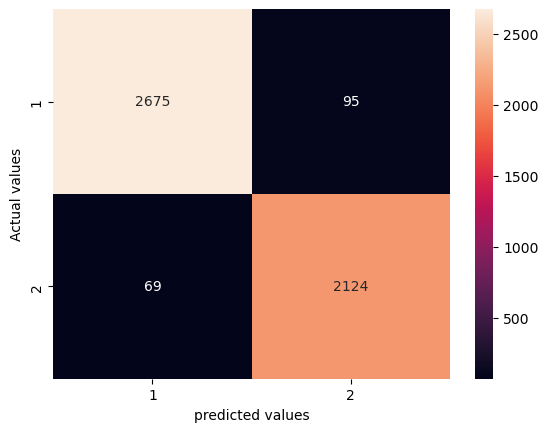

In [106]:
integ_knn_cm=confusion_matrix(integ_y_test,integ_knn_ypred)
sns.heatmap(integ_knn_cm,annot=True,fmt='d',xticklabels=[1,2],yticklabels=[1,2])
plt.xlabel('predicted values')
plt.ylabel('Actual values')

# SVM (Integrated features)

In [107]:
integ_svm=SVC(kernel='linear')
integ_svm.fit(integ_X_train,integ_y_train)

SVC(kernel='linear')

In [108]:
integ_svm_ypred=integ_svm.predict(integ_X_test)
integ_svm_ypred 

array([1, 2, 2, ..., 1, 2, 2], dtype=int64)

In [109]:
accuracy_score(integ_svm_ypred,integ_y_test)

0.6719725972194237

In [110]:
print(classification_report(integ_y_test,integ_svm_ypred)) 

              precision    recall  f1-score   support

           1       0.72      0.68      0.70      2770
           2       0.62      0.66      0.64      2193

    accuracy                           0.67      4963
   macro avg       0.67      0.67      0.67      4963
weighted avg       0.67      0.67      0.67      4963



In [111]:
print('AUC Score: ',round(roc_auc_score(integ_y_test,integ_svm_ypred)*100,2),'%')

AUC Score:  67.04 %


Text(50.722222222222214, 0.5, 'Actual values')

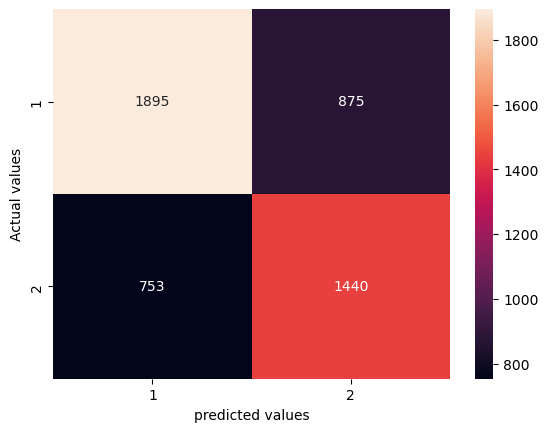

In [112]:
integ_svm_cm=confusion_matrix(integ_y_test,integ_svm_ypred)
sns.heatmap(integ_svm_cm,annot=True,fmt='d',xticklabels=[1,2],yticklabels=[1,2])
plt.xlabel('predicted values')
plt.ylabel('Actual values')

# RandomforestClassifier(integrated feature)

In [113]:
integ_rf=RandomForestClassifier()
integ_rf.fit(integ_X_train,integ_y_train)

RandomForestClassifier()

In [114]:
integ_rf_ypred=integ_rf.predict(integ_X_test)
integ_rf_ypred 

array([2, 2, 2, ..., 2, 1, 1], dtype=int64)

In [115]:
accuracy_score(integ_rf_ypred,integ_y_test)

0.9885150110820069

In [116]:
print(classification_report(integ_y_test,integ_rf_ypred)) 

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2770
           2       0.99      0.99      0.99      2193

    accuracy                           0.99      4963
   macro avg       0.99      0.99      0.99      4963
weighted avg       0.99      0.99      0.99      4963



In [117]:
print('AUC Score: ',round(roc_auc_score(integ_y_test,integ_rf_ypred)*100,2),'%')

AUC Score:  98.82 %


Text(50.722222222222214, 0.5, 'Actual values')

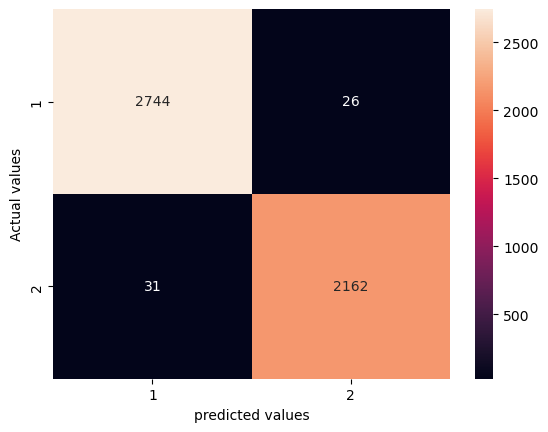

In [118]:
integ_rf_cm=confusion_matrix(integ_y_test,integ_rf_ypred)
sns.heatmap(integ_rf_cm,annot=True,fmt='d',xticklabels=[1,2],yticklabels=[1,2])
plt.xlabel('predicted values')
plt.ylabel('Actual values')

# MLPClassifier(integrated feature)

In [119]:
integ_mlp=MLPClassifier()
integ_mlp.fit(integ_X_train,integ_y_train)

MLPClassifier()

In [120]:
integ_mlp_ypred=integ_mlp.predict(integ_X_test)
integ_mlp_ypred 

array([2, 2, 2, ..., 2, 2, 1], dtype=int64)

In [121]:
accuracy_score(integ_mlp_ypred,integ_y_test)

0.9443884747128752

In [122]:
print(classification_report(integ_y_test,integ_mlp_ypred)) 

              precision    recall  f1-score   support

           1       0.98      0.92      0.95      2770
           2       0.91      0.97      0.94      2193

    accuracy                           0.94      4963
   macro avg       0.94      0.95      0.94      4963
weighted avg       0.95      0.94      0.94      4963



In [123]:
print('AUC Score: ',round(roc_auc_score(integ_y_test,integ_mlp_ypred)*100,2),'%')

AUC Score:  94.72 %


Text(50.722222222222214, 0.5, 'Actual values')

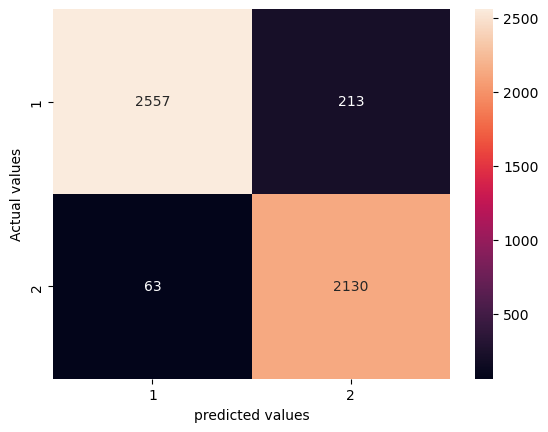

In [124]:
integ_mlp_cm=confusion_matrix(integ_y_test,integ_mlp_ypred)
sns.heatmap(integ_mlp_cm,annot=True,fmt='d',xticklabels=[1,2],yticklabels=[1,2])
plt.xlabel('predicted values')
plt.ylabel('Actual values')

# Ensemble Classifier(Integrated feature)

In [125]:
integ_ensemble = VotingClassifier(estimators=[
    ('lr', integ_lr),
    ('svm', integ_svm),
    ('rf', integ_rf)
], voting='hard')
integ_ensemble.fit(integ_X_train, integ_y_train)



VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svm', SVC(kernel='linear')),
                             ('rf', RandomForestClassifier())])

In [126]:
integ_ens_ypred=integ_ensemble.predict(integ_X_test)
integ_ens_ypred 

array([1, 2, 2, ..., 1, 2, 2], dtype=int64)

In [127]:
accuracy_score(integ_ens_ypred,integ_y_test)

0.6953455571227081

In [128]:
print(classification_report(integ_y_test,integ_ens_ypred)) 

              precision    recall  f1-score   support

           1       0.73      0.73      0.73      2770
           2       0.65      0.66      0.66      2193

    accuracy                           0.70      4963
   macro avg       0.69      0.69      0.69      4963
weighted avg       0.70      0.70      0.70      4963



In [129]:
print('AUC Score: ',round(roc_auc_score(integ_y_test,integ_ens_ypred)*100,2),'%')

AUC Score:  69.14 %


Text(50.722222222222214, 0.5, 'Actual values')

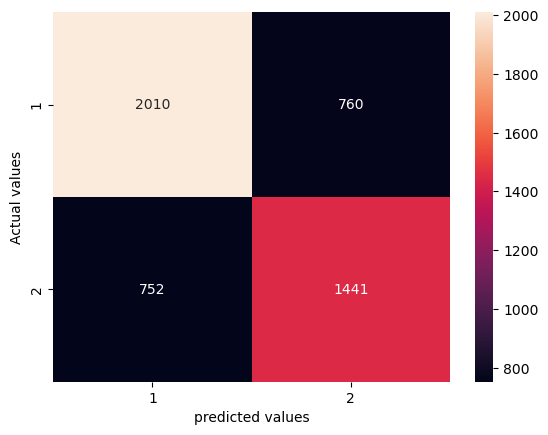

In [130]:
integ_ens_cm=confusion_matrix(integ_y_test,integ_ens_ypred)
sns.heatmap(integ_ens_cm,annot=True,fmt='d',xticklabels=[1,2],yticklabels=[1,2])
plt.xlabel('predicted values')
plt.ylabel('Actual values')

# Cross Validation

In [131]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('k-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Multi-Layer Perceptron', MLPClassifier()),
    ('Ensemble', VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('svm', SVC()),
        ('rf', RandomForestClassifier()),
        ('mlp', MLPClassifier())
    ], voting='hard'))
]



In [132]:
# Perform 10-fold cross-validation
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=kfold)
    accuracy = accuracy_score(y, y_pred)
    auc_score = roc_auc_score(y, y_pred)
    report = classification_report(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    print(f'{name}:')
    print('Accuracy:', accuracy)
    print('AUC Score:', auc_score)
    print('Classification Report:')
    print(report)
    print('Confusion Matrix:')
    print(conf_matrix)
    print('----------------------------------------------------')

Logistic Regression:
Accuracy: 0.6596670831486035
AUC Score: 0.6518001658756855
Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.72      0.70     13811
           2       0.62      0.58      0.60     11000

    accuracy                           0.66     24811
   macro avg       0.65      0.65      0.65     24811
weighted avg       0.66      0.66      0.66     24811

Confusion Matrix:
[[9961 3850]
 [4594 6406]]
----------------------------------------------------
k-Nearest Neighbors:
Accuracy: 0.9690056829632018
AUC Score: 0.9691901350043773
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.97      0.97     13811
           2       0.96      0.97      0.97     11000

    accuracy                           0.97     24811
   macro avg       0.97      0.97      0.97     24811
weighted avg       0.97      0.97      0.97     24811

Confusion Matrix:
[[13363   448]
 [  321 1

# Cross Validation on Integrated Feature

In [133]:
integ_X=np.real(extracted_features)

In [134]:
# Perform 10-fold cross-validation
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, integ_X, integ_y, cv=kfold)
    accuracy = accuracy_score(integ_y, y_pred)
    auc_score = roc_auc_score(integ_y, y_pred)
    report = classification_report(integ_y, y_pred)
    conf_matrix = confusion_matrix(integ_y,y_pred)
    print(f'{name}:')
    print('Accuracy:', accuracy)
    print('AUC Score:', auc_score)
    print('Classification Report:')
    print(report)
    print('Confusion Matrix:')
    print(conf_matrix)
    print('----------------------------------------------------')

Logistic Regression:
Accuracy: 0.6599089113699569
AUC Score: 0.6520728931484127
Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.72      0.70     13811
           2       0.62      0.58      0.60     11000

    accuracy                           0.66     24811
   macro avg       0.65      0.65      0.65     24811
weighted avg       0.66      0.66      0.66     24811

Confusion Matrix:
[[9961 3850]
 [4588 6412]]
----------------------------------------------------
k-Nearest Neighbors:
Accuracy: 0.9679980653742292
AUC Score: 0.9681000289624212
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.97      0.97     13811
           2       0.96      0.97      0.96     11000

    accuracy                           0.97     24811
   macro avg       0.97      0.97      0.97     24811
weighted avg       0.97      0.97      0.97     24811

Confusion Matrix:
[[13358   453]
 [  341 1

In [135]:
pca_models = [
    ('LR', LogisticRegression()),
    ('RF', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC()),
    ('MLP', MLPClassifier()),
    ('Ensemble', VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('knn', KNeighborsClassifier()), ('svm', SVC()), ('mlp', MLPClassifier())])),
]

lda_models = [
    ('LR', LogisticRegression()),
    ('RF', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC()),
    ('MLP', MLPClassifier()),
    ('Ensemble', VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('knn', KNeighborsClassifier()), ('svm', SVC()), ('mlp', MLPClassifier())])),
]

fa_models = [
    ('LR', LogisticRegression()),
    ('RF', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC()),
    ('MLP', MLPClassifier()),
    ('Ensemble', VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('knn', KNeighborsClassifier()), ('svm', SVC()), ('mlp', MLPClassifier())])),
]


# Cross Validation for PCA

In [136]:
X_pca_transformed = np.dot(X_pca, pca_components.T)

for name, model in pca_models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X_pca_transformed, y, cv=kfold)
    accuracy = accuracy_score(y, y_pred)
    auc_score = roc_auc_score(y, y_pred)
    report = classification_report(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    print(f'PCA {name}:')
    print('Accuracy:', accuracy)
    print('AUC Score:', auc_score)
    print('Classification Report:')
    print(report)
    print('Confusion Matrix:')
    print(conf_matrix)
    print('----------------------------------------------------')

PCA LR:
Accuracy: 0.6672443674176777
AUC Score: 0.6569873190671467
Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.75      0.71     13811
           2       0.64      0.57      0.60     11000

    accuracy                           0.67     24811
   macro avg       0.66      0.66      0.66     24811
weighted avg       0.67      0.67      0.66     24811

Confusion Matrix:
[[10324  3487]
 [ 4769  6231]]
----------------------------------------------------
PCA RF:
Accuracy: 0.9923824110273669
AUC Score: 0.9919641820419823
Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99     13811
           2       0.99      0.99      0.99     11000

    accuracy                           0.99     24811
   macro avg       0.99      0.99      0.99     24811
weighted avg       0.99      0.99      0.99     24811

Confusion Matrix:
[[13751    60]
 [  129 10871]]
---------------

# Cross Validation for LDA

In [137]:
lda_coefficients_real = np.real(lda_coefficients)
X_lda_real=np.real(X_lda)
X_lda_transformed = np.dot(X_lda_real, lda_coefficients_real.T)

for name, model in lda_models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X_lda_transformed, y, cv=kfold)
    accuracy = accuracy_score(y, y_pred)
    auc_score = roc_auc_score(y, y_pred)
    report = classification_report(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    print(f'LDA {name}:')
    print('Accuracy:', accuracy)
    print('AUC Score:', auc_score)
    print('Classification Report:')
    print(report)
    print('Confusion Matrix:')
    print(conf_matrix)
    print('----------------------------------------------------')


LDA LR:
Accuracy: 0.6599492160735158
AUC Score: 0.6521553537693933
Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.72      0.70     13811
           2       0.62      0.58      0.60     11000

    accuracy                           0.66     24811
   macro avg       0.65      0.65      0.65     24811
weighted avg       0.66      0.66      0.66     24811

Confusion Matrix:
[[9957 3854]
 [4583 6417]]
----------------------------------------------------
LDA RF:
Accuracy: 0.6299625166256902
AUC Score: 0.6254608414899849
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.67      0.67     13811
           2       0.58      0.59      0.58     11000

    accuracy                           0.63     24811
   macro avg       0.63      0.63      0.63     24811
weighted avg       0.63      0.63      0.63     24811

Confusion Matrix:
[[9187 4624]
 [4557 6443]]
-----------------------

# Cross Validation for FA 

In [138]:
X_fa_transformed = np.dot(X_fa, fa_components)


for name, model in fa_models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X_fa_transformed, y, cv=kfold)
    accuracy = accuracy_score(y, y_pred)
    auc_score = roc_auc_score(y, y_pred)
    report = classification_report(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    print(f'FA {name}:')
    print('Accuracy:', accuracy)
    print('AUC Score:', auc_score)
    print('Classification Report:')
    print(report)
    print('Confusion Matrix:')
    print(conf_matrix)
    print('----------------------------------------------------')


FA LR:
Accuracy: 0.660271653701987
AUC Score: 0.6521859354532947
Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.72      0.70     13811
           2       0.63      0.58      0.60     11000

    accuracy                           0.66     24811
   macro avg       0.66      0.65      0.65     24811
weighted avg       0.66      0.66      0.66     24811

Confusion Matrix:
[[9993 3818]
 [4611 6389]]
----------------------------------------------------
FA RF:
Accuracy: 0.9837168997622022
AUC Score: 0.9831443612140521
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99     13811
           2       0.99      0.98      0.98     11000

    accuracy                           0.98     24811
   macro avg       0.98      0.98      0.98     24811
weighted avg       0.98      0.98      0.98     24811

Confusion Matrix:
[[13648   163]
 [  241 10759]]
----------------------